##Reverse a linked list

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None


def reverse_linked_list(head):
    prev = None
    curr = head

    while curr:
        next_node = curr.next
        curr.next = prev
        prev = curr
        curr = next_node

    return prev



# Create a sample linked list: 1 -> 2 -> 3 -> 4 -> 5
head = Node(1)
head.next = Node(2)
head.next.next = Node(3)
head.next.next.next = Node(4)
head.next.next.next.next = Node(5)

# Print the original linked list
current = head
while current:
    print(current.data, end=" ")
    current = current.next
# Output: 1 2 3 4 5

print('\n')

# Reverse the linked list
new_head = reverse_linked_list(head)

# Print the reversed linked list
current = new_head
while current:
    print(current.data, end=" ")
    current = current.next
# Output: 5 4 3 2 1


1 2 3 4 5 

5 4 3 2 1 

##Detecting a cycle

Detecting cycles in linked lists has several applications in various domains. Here are a few notable applications:

1. Memory Management: Cycle detection is crucial in garbage collection algorithms used in memory management systems. By detecting cycles in linked data structures, such as graphs or object references, the garbage collector can identify and reclaim memory that is no longer reachable by the program, preventing memory leaks.

2. Graph Algorithms: Linked lists can be used to represent graphs, where each node represents a vertex and the edges are defined by the pointers between nodes. Detecting cycles in linked lists helps in algorithms such as cycle detection, topological sorting, and finding strongly connected components in directed graphs.

3. Floyd's Cycle Detection Algorithm: Floyd's Cycle Detection Algorithm, also known as the "tortoise and hare algorithm," is based on detecting cycles in linked lists. This algorithm is used in various applications, such as finding the starting point of a cycle, determining the length of the cycle, or solving problems related to modular arithmetic.



In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None


def has_cycle(head):
    slow_ptr = head
    fast_ptr = head

    while fast_ptr and fast_ptr.next:
        slow_ptr = slow_ptr.next
        fast_ptr = fast_ptr.next.next

        if slow_ptr == fast_ptr:
            return True

    return False


# Create a sample linked list with a cycle: 1 -> 2 -> 3 -> 4 -> 5 -> 2 (points back to node 2)
head = Node(1)
head.next = Node(2)
head.next.next = Node(3)
head.next.next.next = Node(4)
head.next.next.next.next = Node(5)
head.next.next.next.next.next = head.next  # Create a cycle

# Detect the cycle in the linked list
has_cycle_result = has_cycle(head)
print(has_cycle_result)
# Output: True



True


##Graphs

What is a Graph?
A graph consists of a finite set of vertices or nodes and a set of edges connecting these vertices. Two vertices are said to be adjacent if they are connected to each other by the same edge.

Some basic definitions related to graphs are given below. You can refer to Figure 1 for examples.

* Order: The number of vertices in the graph
* Size: The number of edges in the graph
* Vertex degree: The number of edges that are incident to a vertex
* Isolated vertex: A vertex that is not connected to any other vertices in the graph
* Self-loop: An edge from a vertex to itself
* Directed graph: A graph where all the edges have a direction indicating what is the start vertex and what is the end vertex
* Undirected graph: A graph with edges that have no direction
* Weighted graph: Edges of the graph has weights
* Unweighted graph: Edges of the graph has no weights


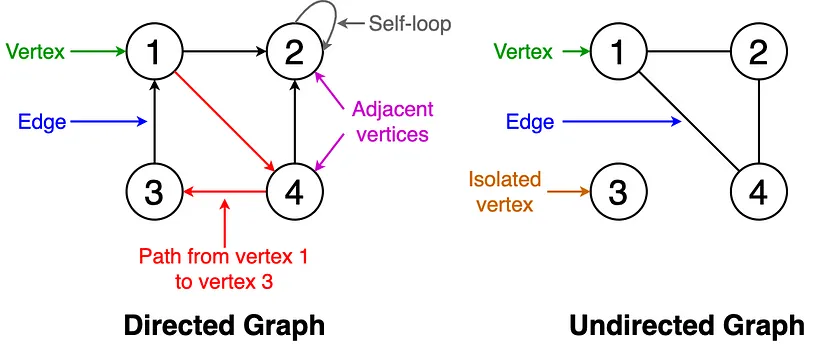

##Topological Sorting

Topological sorting of a graph is a linear ordering of its vertices so that for each directed edge (u, v) in the ordering, vertex u comes before v.

Example of a topological ordering of vertices (1, 2, 3, 5, 4, 6, 7, 8). You can see that vertex 5 should come after vertices 2 and 3. Similarly, vertex 6 should come after vertices 4 and 5.

In [ ]:
from IPython.display import Image
Image(url='https://miro.medium.com/v2/resize:fit:828/1*tdDEOGGAn-L6MpdxDlaJkw.gif')

Node 1 added to the graph.
Node 2 added to the graph.
Node 3 added to the graph.
Node 4 added to the graph.
Edge (2, 4) added to the graph.
Edge (1, 2) added to the graph.
Edge (2, 3) added to the graph.


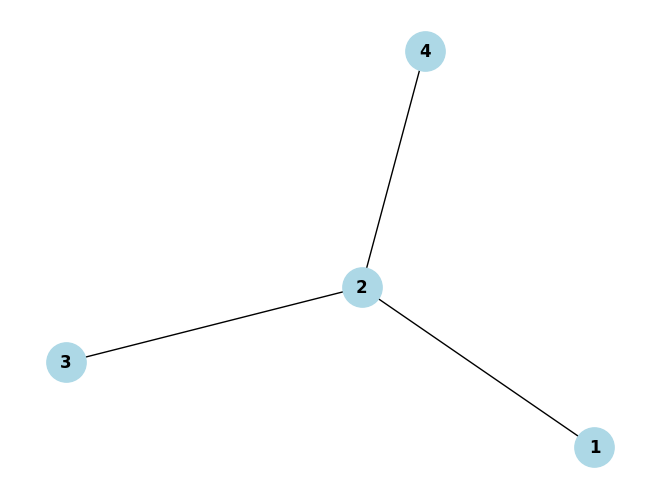

Node 2 deleted from the graph.




Updated Graph:


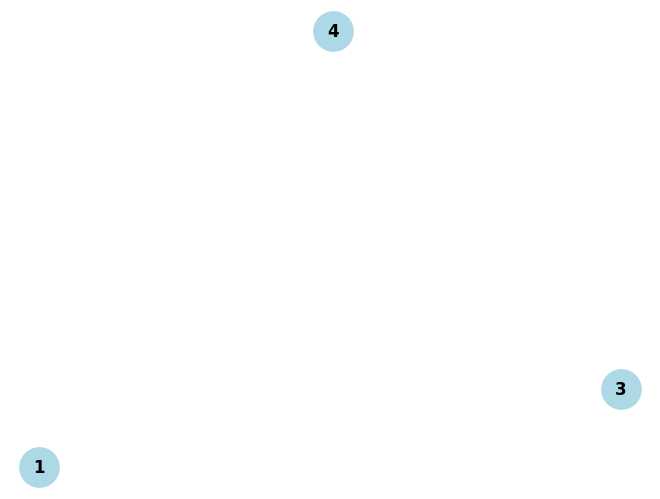

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

class Graph:
    def __init__(self):
        self.nodes = {}
        self.edges = []

    def add_node(self, node):
        if node not in self.nodes:
            self.nodes[node] = []
            print(f"Node {node} added to the graph.")
        else:
            print(f"Node {node} already exists in the graph.")

    def delete_node(self, node):
        if node in self.nodes:
            del self.nodes[node]
            self.edges = [(u, v) for u, v in self.edges if u != node and v != node]
            print(f"Node {node} deleted from the graph.")
        else:
            print(f"Node {node} does not exist in the graph.")

    def add_edge(self, node1, node2):
        if node1 in self.nodes and node2 in self.nodes:
            if (node1, node2) not in self.edges and (node2, node1) not in self.edges:
                self.edges.append((node1, node2))
                self.nodes[node1].append(node2)
                self.nodes[node2].append(node1)
                print(f"Edge ({node1}, {node2}) added to the graph.")
            else:
                print(f"Edge ({node1}, {node2}) already exists in the graph.")
        else:
            print(f"One or both nodes ({node1}, {node2}) do not exist in the graph.")

    def delete_edge(self, node1, node2):
        if (node1, node2) in self.edges:
            self.edges.remove((node1, node2))
            self.nodes[node1].remove(node2)
            self.nodes[node2].remove(node1)
            print(f"Edge ({node1}, {node2}) deleted from the graph.")
        else:
            print(f"Edge ({node1}, {node2}) does not exist in the graph.")

    def display_graph(self):
        G = nx.Graph()
        G.add_nodes_from(self.nodes.keys())
        G.add_edges_from(self.edges)

        nx.draw(G, with_labels=True, node_color='lightblue', node_size=800, font_weight='bold')
        plt.show()

# Create an empty graph
G = Graph()

# Adding nodes and edges to the graph
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_edge(2, 4)
G.add_edge(1, 2)
G.add_edge(2, 3)

# Displaying the graph
G.display_graph()

# Deleting nodes and edges from the graph
G.delete_node(2)

# Displaying the updated graph

print('\n\n\n\nUpdated Graph:')
G.display_graph()
